In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
train = pd.read_csv('adult.csv')

In [3]:
train['capital_gain'] = train['capital_gain'].replace(0,np.nan)

In [4]:
train['capital_loss'] = train['capital_loss'].replace(0,np.nan)

In [5]:
mean_value_gain=train['capital_gain'].mean()
train['capital_gain']=train['capital_gain'].fillna(mean_value_gain)
mean_value_loss=train['capital_loss'].mean()
train['capital_loss']=train['capital_loss'].fillna(mean_value_loss)

In [6]:
train['workclass']=train['workclass'].replace('?',np.nan)
train['occupation']=train['occupation'].replace('?',np.nan)
train['native.country']=train['native.country'].replace('?',np.nan)

In [7]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,<=50K


In [8]:
train.drop(['education'], axis=1, inplace=True)
train.drop(['fnlwgt'], axis=1, inplace=True)
train.drop(['native.country'], axis=1, inplace=True)

In [9]:
train

,age,workclass,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,12938.541298,4356.000000,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.000000,18,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,12938.541298,4356.000000,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.000000,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.000000,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,12938.541298,1871.428571,40,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,12938.541298,1871.428571,38,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12938.541298,1871.428571,40,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,12938.541298,1871.428571,40,<=50K


In [10]:
train['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
#replace_map = {train['workclass']: {'Private': 1, 'Self-emp-not-inc': 2, 'Local-gov': 3, 'State-gov': 4,'Self-emp-inc': 5, 'Federal-gov': 6, 'Without-pay': 7 , 'Never-worked': 8 }}
train['workclass']=train['workclass'].fillna('Private')
train['occupation']=train['occupation'].fillna('Prof-specialty')

In [12]:
mapping = {'<=50K': 0, '>50K': 1}
map_train = train.replace({'income':mapping})

In [13]:
map_train

,age,workclass,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.000000,40,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.000000,18,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.000000,40,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.000000,40,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.000000,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,12938.541298,1871.428571,40,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,12938.541298,1871.428571,38,0
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12938.541298,1871.428571,40,1
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,12938.541298,1871.428571,40,0


In [14]:
categorical=['race','sex','relationship','marital_status','occupation','workclass']
for feature in categorical:
    le = LabelEncoder()
    map_train[feature] = le.fit_transform(map_train[feature])

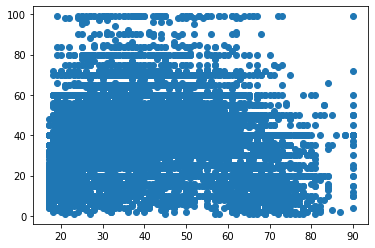

In [15]:
plt.scatter(map_train.age,map_train.hours_per_week)
plt.show()

In [16]:
X= map_train.drop('income',axis=1)
y= map_train['income']

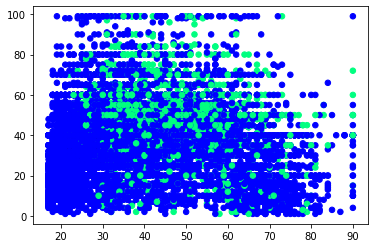

In [17]:
color_theme=np.array(['lightgreen','blue'])
plt.scatter(X.values[:,0],X.values[:,10],c=y,s=30,cmap='winter')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
s_v_m= svm.SVC()
s_v_m.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
#plt.scatter(X_train.values[:, 0], X_train.values[:, 10], c=y_train, cmap='winter');
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()

#xx = np.linspace(xlim[0], xlim[1])
#yy = np.linspace(ylim[0], ylim[1])

#YY,XX= np.meshgrid(yy,xx)
#xy= np.vstack([XX.ravel(),YY.ravel()]+ [np.repeat(0, XX.ravel().size) for _ in range(9)]).T
#Z = s_v_m.decision_function(xy).reshape(XX.shape)

#ax.contour(XX, YY, Z, colors='k', #levels=[-1,0,1],
          #alpha=0.5,
          #linestyles=['--', '-', '--'])

#ax.scatter(s_v_m.support_vectors_[:,0],
          #s_v_m.support_vectors_[:,10], s=100,
          #linewidth=1, facecolors='none')
#plt.show()

In [ ]:
#plt.scatter(X_train.values[:, 0], X_train.values[:, 10], c=y_train, cmap='winter');
#ax = plt.gca()
#xlim = ax.get_xlim()
#w = s_v_m.coef_[0]
#a = -w[0] / w[1]
#xx = np.linspace(xlim[0], xlim[1])

#yy = a * xx - s_v_m.intercept_[0] / w[1]
#plt.plot(xx, yy)

#yy = a * xx - (s_v_m.intercept_[0] - 1) / w[1]
#plt.plot(xx, yy, 'k--')

#yy = a * xx - (s_v_m.intercept_[0] + 1) / w[1]
#plt.plot(xx, yy, 'k--')

In [34]:
y_pred = s_v_m.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[6139,   54],
       [1674,  274]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.7877410637513819

In [ ]:
#s_v_m = svm.SVC(kernel='linear',C=1)
#s_v_m.fit(X_train,X_test)